### 

In [277]:
import pandas as pd
import numpy as np
from pathlib import Path
import sklearn 
import matplotlib.pyplot as plt

In [278]:
# Read in the CSV file and create the Pandas Dataframe
KC_crimes = pd.read_csv(Path("./Resources/KCPD_Crime_Data_2023.csv"))
 
# Review the DataFrame
KC_crimes.head()

,Report_No,Reported_Date,Reported_Time,Offense,IBRS,Description,Address,City,Zip Code,Area,DVFlag,Involvement,Race,Sex,Age,Fire Arm Used Flag,Location
0,KC23000049,01/01/2023,02:55,Casualty,NaN,NaN,1900 NE 49TH ST,KANSAS CITY,64118.0,SCP,False,VIC,B,M,37.0,False,POINT (-94.557504996 39.183924016)
1,KC23000346,01/02/2023,14:00,Assault (Aggravated),13A,Aggravated Assault,I 35 HWY and PASEO,KANSAS CITY,64106.0,CPD,False,SUS,W,M,NaN,False,POINT (-94.567090038 39.063079981)
2,KC23000490,01/03/2023,07:39,Stealing - Shoplift,23C,Shoplifting,3800 INDEPENDENCE AVE,KANSAS CITY,64124.0,EPD,False,VIC,NaN,NaN,NaN,False,POINT (-94.537153514 39.105905137)
3,KC23000819,01/04/2023,15:23,Loss,NaN,NaN,7600 MONROE AVE,KANSAS CITY,64128.0,MPD,False,VIC,B,M,28.0,False,POINT (-94.540035187 39.073080307)
4,KC23001555,01/07/2023,23:10,Property Damage,120,Robbery,3000 VAN BRUNT BLVD,KANSAS CITY,64128.0,EPD,False,VIC,NaN,NaN,NaN,True,POINT (-94.520866347 39.070814751)


In [279]:
KC_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75292 entries, 0 to 75291
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Report_No           75292 non-null  object 
 1   Reported_Date       75292 non-null  object 
 2   Reported_Time       75292 non-null  object 
 3   Offense             75292 non-null  object 
 4   IBRS                68096 non-null  object 
 5   Description         68096 non-null  object 
 6   Address             75292 non-null  object 
 7   City                75292 non-null  object 
 8   Zip Code            70894 non-null  float64
 9   Area                75292 non-null  object 
 10  DVFlag              75292 non-null  bool   
 11  Involvement         75292 non-null  object 
 12  Race                64700 non-null  object 
 13  Sex                 65587 non-null  object 
 14  Age                 54604 non-null  float64
 15  Fire Arm Used Flag  75292 non-null  bool   
 16  Loca

In [280]:
# Read in the CSV file again but parse dates and create the Pandas Dataframe
KC_crimes = pd.read_csv(Path("./Resources/KCPD_Crime_Data_2023.csv"),
                       parse_dates=["Reported_Date"])
KC_crimes.head()

,Report_No,Reported_Date,Reported_Time,Offense,IBRS,Description,Address,City,Zip Code,Area,DVFlag,Involvement,Race,Sex,Age,Fire Arm Used Flag,Location
0,KC23000049,2023-01-01,02:55,Casualty,NaN,NaN,1900 NE 49TH ST,KANSAS CITY,64118.0,SCP,False,VIC,B,M,37.0,False,POINT (-94.557504996 39.183924016)
1,KC23000346,2023-01-02,14:00,Assault (Aggravated),13A,Aggravated Assault,I 35 HWY and PASEO,KANSAS CITY,64106.0,CPD,False,SUS,W,M,NaN,False,POINT (-94.567090038 39.063079981)
2,KC23000490,2023-01-03,07:39,Stealing - Shoplift,23C,Shoplifting,3800 INDEPENDENCE AVE,KANSAS CITY,64124.0,EPD,False,VIC,NaN,NaN,NaN,False,POINT (-94.537153514 39.105905137)
3,KC23000819,2023-01-04,15:23,Loss,NaN,NaN,7600 MONROE AVE,KANSAS CITY,64128.0,MPD,False,VIC,B,M,28.0,False,POINT (-94.540035187 39.073080307)
4,KC23001555,2023-01-07,23:10,Property Damage,120,Robbery,3000 VAN BRUNT BLVD,KANSAS CITY,64128.0,EPD,False,VIC,NaN,NaN,NaN,True,POINT (-94.520866347 39.070814751)


In [281]:
KC_crimes.Reported_Date.dtype

dtype('<M8[ns]')

In [285]:
# Sort Dataframe by Reported_Date
KC_crimes.sort_values(by = ["Reported_Date"], inplace=True, ascending=True)
KC_crimes.Reported_Date.tail(10)


55803   2023-09-10
66409   2023-09-10
66529   2023-09-10
69256   2023-09-10
61998   2023-09-10
69075   2023-09-10
71079   2023-09-10
69084   2023-09-10
64905   2023-09-10
61909   2023-09-10
Name: Reported_Date, dtype: datetime64[ns]

In [286]:
# Make a copy of the original DataFrame to perform edits on 
KC_crimes_tmp = KC_crimes.copy()

In [287]:
KC_crimes.Report_No.nunique()

43277

In [288]:
## Turning Report_no column into a numeric variable by replacing the charachters KC with ''
KC_crimes_tmp["Report_No"] = KC_crimes.Report_No.apply(lambda x : int(x.replace('KC', '')))
KC_crimes_tmp.head()

,Report_No,Reported_Date,Reported_Time,Offense,IBRS,Description,Address,City,Zip Code,Area,DVFlag,Involvement,Race,Sex,Age,Fire Arm Used Flag,Location
0,23000049,2023-01-01,02:55,Casualty,NaN,NaN,1900 NE 49TH ST,KANSAS CITY,64118.0,SCP,False,VIC,B,M,37.0,False,POINT (-94.557504996 39.183924016)
9834,23000017,2023-01-01,00:13,Domestic Violence Assault (Non-Aggravated),13B,Simple Assault,9800 CHERRY ST,KANSAS CITY,64131.0,SPD,False,VIC SUS,B,F,27.0,False,POINT (-94.585296079 38.949754632)
9821,23000190,2023-01-01,20:11,Domestic Violence Assault (Non-Aggravated),13B,Simple Assault,11300 COLORADO AVE,KANSAS CITY,64137.0,SPD,True,VIC,W,M,NaN,False,POINT (-94.530581988 38.919673999)
10257,23000120,2023-01-01,12:35,Stealing from Auto (Theft from Auto),23F,Theft From Motor Vehicle,3400 BELLEFONTAINE AVE,KANSAS CITY,64128.0,EPD,False,VIC,W,M,38.0,False,POINT (-94.547684004 39.06415102)
11310,23000087,2023-01-01,09:08,Assault (Aggravated),13A,Aggravated Assault,N HAMPTON RD and NW TIFFANY PARK RD,KANSAS CITY,64153.0,NPD,False,VIC,W,M,35.0,True,POINT (-94.736719977 39.256529989)


In [289]:
# Reported time is now an object. We are going to turn it into names before appying one hot encoding 
# Morning 5 am to 12 pm (noon)
# Afternoon 12 pm to 5 pm.
# Evening 5 pm to 9 pm.
# Night 9 pm to 4 am.
 
# First let's make it an int 
KC_crimes_tmp["Reported_Time"] = KC_crimes_tmp.Reported_Time.apply(lambda x: int(x.replace(':','')))


KC_crimes_tmp["Reported_Time"] = KC_crimes_tmp.Reported_Time.apply(lambda x: "Morning" if (x > 500 and x <= 1159) 
                                                                        else "Afternoon" if (x > 1159 and x <= 1700)
                                                                        else "Evening" if (x > 1700 and x <= 2100)
                                                                        else "Night")
KC_crimes_tmp.head()



,Report_No,Reported_Date,Reported_Time,Offense,IBRS,Description,Address,City,Zip Code,Area,DVFlag,Involvement,Race,Sex,Age,Fire Arm Used Flag,Location
0,23000049,2023-01-01,Night,Casualty,NaN,NaN,1900 NE 49TH ST,KANSAS CITY,64118.0,SCP,False,VIC,B,M,37.0,False,POINT (-94.557504996 39.183924016)
9834,23000017,2023-01-01,Night,Domestic Violence Assault (Non-Aggravated),13B,Simple Assault,9800 CHERRY ST,KANSAS CITY,64131.0,SPD,False,VIC SUS,B,F,27.0,False,POINT (-94.585296079 38.949754632)
9821,23000190,2023-01-01,Evening,Domestic Violence Assault (Non-Aggravated),13B,Simple Assault,11300 COLORADO AVE,KANSAS CITY,64137.0,SPD,True,VIC,W,M,NaN,False,POINT (-94.530581988 38.919673999)
10257,23000120,2023-01-01,Afternoon,Stealing from Auto (Theft from Auto),23F,Theft From Motor Vehicle,3400 BELLEFONTAINE AVE,KANSAS CITY,64128.0,EPD,False,VIC,W,M,38.0,False,POINT (-94.547684004 39.06415102)
11310,23000087,2023-01-01,Morning,Assault (Aggravated),13A,Aggravated Assault,N HAMPTON RD and NW TIFFANY PARK RD,KANSAS CITY,64153.0,NPD,False,VIC,W,M,35.0,True,POINT (-94.736719977 39.256529989)


### Add datetime parameter for Reported_Date column 

In [290]:
# Extract the day and the month, not the year because it is all 2023
KC_crimes_tmp["crimeMonth"]= KC_crimes_tmp.Reported_Date.dt.month
KC_crimes_tmp["crimeDay"] = KC_crimes_tmp.Reported_Date.dt.day

In [291]:
KC_crimes_tmp.tail()

,Report_No,Reported_Date,Reported_Time,Offense,IBRS,Description,Address,City,Zip Code,Area,DVFlag,Involvement,Race,Sex,Age,Fire Arm Used Flag,Location,crimeMonth,crimeDay
69075,23061812,2023-09-10,Night,Stealing - Other,23H,All Other Larceny,1000 GRAND BLVD,KANSAS CITY,64106.0,CPD,False,SUS,U,U,NaN,False,POINT (-94.581202983 39.10203299),9,10
71079,23061886,2023-09-10,Morning,Domestic Violence Assault (Non-Aggravated),13B,Simple Assault,6700 N DALTON CT,KANSAS CITY,64151.0,NPD,False,SUS,B,M,NaN,False,POINT (-94.649283721 39.215700185),9,10
69084,23061950,2023-09-10,Afternoon,Vehicular - Non-Injury,90D,Driving Under the Influence,E 74TH ST and PASEO,KANSAS CITY,64131.0,MPD,False,ARR CHA SUS,B,F,32.0,False,POINT (-94.566410014 38.992979987),9,10
64905,23062034,2023-09-10,Night,Trespass of Real Property,90J,Trespass of Real Property,11600 E US 40 HWY,KANSAS CITY,64133.0,EPD,False,ARR CHA SUS,W,M,NaN,False,POINT (-94.441189552 39.046521914),9,10
61909,23061846,2023-09-10,Night,State Warrant Arrest,NaN,NaN,NE VIVION RD and N NORTON AVE,KANSAS CITY,NaN,SCP,False,SUS,W,M,24.0,False,POINT (-94.531870035 39.188020001),9,10


In [292]:
# we can remove Reported_date column now that we have created a derived day and month column
KC_crimes_tmp.drop("Reported_Date", axis = 1, inplace=True )
KC_crimes_tmp.head()

,Report_No,Reported_Time,Offense,IBRS,Description,Address,City,Zip Code,Area,DVFlag,Involvement,Race,Sex,Age,Fire Arm Used Flag,Location,crimeMonth,crimeDay
0,23000049,Night,Casualty,NaN,NaN,1900 NE 49TH ST,KANSAS CITY,64118.0,SCP,False,VIC,B,M,37.0,False,POINT (-94.557504996 39.183924016),1,1
9834,23000017,Night,Domestic Violence Assault (Non-Aggravated),13B,Simple Assault,9800 CHERRY ST,KANSAS CITY,64131.0,SPD,False,VIC SUS,B,F,27.0,False,POINT (-94.585296079 38.949754632),1,1
9821,23000190,Evening,Domestic Violence Assault (Non-Aggravated),13B,Simple Assault,11300 COLORADO AVE,KANSAS CITY,64137.0,SPD,True,VIC,W,M,NaN,False,POINT (-94.530581988 38.919673999),1,1
10257,23000120,Afternoon,Stealing from Auto (Theft from Auto),23F,Theft From Motor Vehicle,3400 BELLEFONTAINE AVE,KANSAS CITY,64128.0,EPD,False,VIC,W,M,38.0,False,POINT (-94.547684004 39.06415102),1,1
11310,23000087,Morning,Assault (Aggravated),13A,Aggravated Assault,N HAMPTON RD and NW TIFFANY PARK RD,KANSAS CITY,64153.0,NPD,False,VIC,W,M,35.0,True,POINT (-94.736719977 39.256529989),1,1


<Axes: xlabel='crimeMonth'>

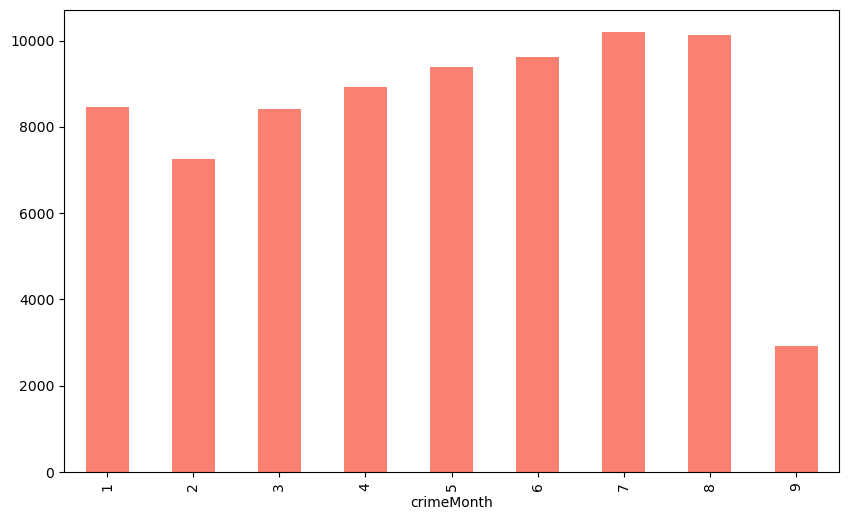

In [338]:
# Create a plot of the number of offenses monthly
KC_crimes_tmp.groupby("crimeMonth")["Offense"].count().plot(kind = "bar",
                                                           figsize = (10,6),
                                                           color = ["salmon"],
                                                           )


<Axes: >

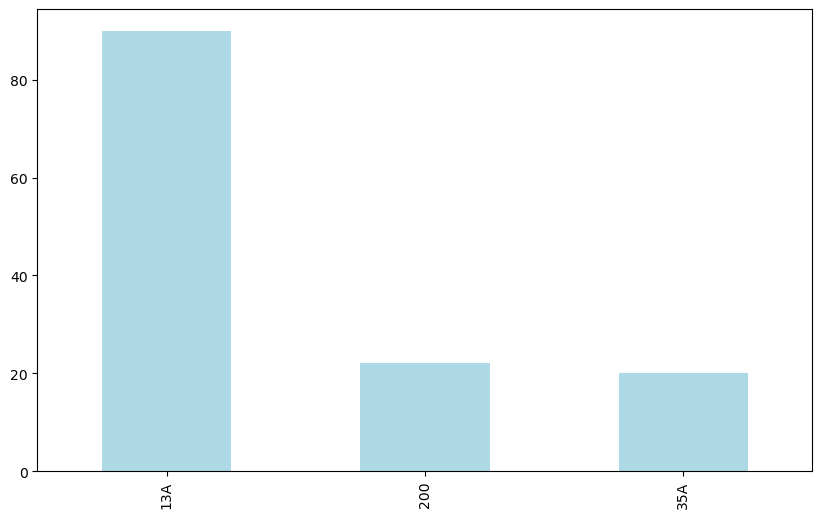

In [327]:
# Create plot and test deffirent offenses to see witch IBRS code is hither in other word what offense is more frequent
KC_crimes_tmp[KC_crimes_tmp["Offense"] == "Casualty"]["IBRS"].value_counts().plot(kind = "bar",
                                                                                 figsize = (10,6),
                                                                                 color = ["lightblue"])

### In this following part We are going to do some manipulation for our target variable "Offence" . The goal is to group the offence into similar type based on the IBRS column that is the code for every offence  

1. Example 
    * The offence named -Drug/Narcotic Violations has the IBRS code 35A and the offence named -Drug/Narcotic Equip.  Violations has the IBRS code 35B, in this case we will group this two offenses into one group called Drug/Narcotic Offenses, this two offenses are grouped into one so now we can predict Drug/Narcotic Offenses category instead of predicting which exactly is the offense.
2. To help separate the offenses into groups we are using a pdf that we find in this gouvernment website
    * https://bjs.ojp.gov/sites/g/files/xyckuh236/files/media/document/offensea_offenseb.pdf 
    
   # But first we need to fill the NaN values for IBRS 


In [339]:
# Forward fill and backward fill of Na`s
KC_crimes_tmp["IBRS"] = KC_crimes_tmp.groupby("Offense")["IBRS"].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [340]:
KC_crimes_tmp.head()

,Report_No,Reported_Time,Offense,IBRS,Description,Address,City,Zip Code,Area,DVFlag,Involvement,Race,Sex,Age,Fire Arm Used Flag,Location,crimeMonth,crimeDay
0,23000049,Night,Casualty,13A,NaN,1900 NE 49TH ST,KANSAS CITY,64118.0,SCP,False,VIC,B,M,37.0,False,POINT (-94.557504996 39.183924016),1,1
9834,23000017,Night,Domestic Violence Assault (Non-Aggravated),13B,Simple Assault,9800 CHERRY ST,KANSAS CITY,64131.0,SPD,False,VIC SUS,B,F,27.0,False,POINT (-94.585296079 38.949754632),1,1
9821,23000190,Evening,Domestic Violence Assault (Non-Aggravated),13B,Simple Assault,11300 COLORADO AVE,KANSAS CITY,64137.0,SPD,True,VIC,W,M,NaN,False,POINT (-94.530581988 38.919673999),1,1
10257,23000120,Afternoon,Stealing from Auto (Theft from Auto),23F,Theft From Motor Vehicle,3400 BELLEFONTAINE AVE,KANSAS CITY,64128.0,EPD,False,VIC,W,M,38.0,False,POINT (-94.547684004 39.06415102),1,1
11310,23000087,Morning,Assault (Aggravated),13A,Aggravated Assault,N HAMPTON RD and NW TIFFANY PARK RD,KANSAS CITY,64153.0,NPD,False,VIC,W,M,35.0,True,POINT (-94.736719977 39.256529989),1,1


In [193]:
KC_crimes_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75292 entries, 0 to 61909
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Report_No           75292 non-null  int64  
 1   Reported_Time       75292 non-null  object 
 2   Offense             75292 non-null  object 
 3   IBRS                75236 non-null  object 
 4   Description         68096 non-null  object 
 5   Address             75292 non-null  object 
 6   City                75292 non-null  object 
 7   Zip Code            70894 non-null  float64
 8   Area                75292 non-null  object 
 9   DVFlag              75292 non-null  bool   
 10  Involvement         75292 non-null  object 
 11  Race                64700 non-null  object 
 12  Sex                 65587 non-null  object 
 13  Age                 54604 non-null  float64
 14  Fire Arm Used Flag  75292 non-null  bool   
 15  Location            75267 non-null  object 
 16  crim

In [134]:
# Find the columns which contain strings 
for label, content in KC_crimes_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Reported_Time
Offense
IBRS
Description
Address
City
Area
Involvement
Race
Sex
Location
